### Importação dos dados



In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
lojas.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [40]:
lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)

## Faturamento Total

In [41]:
# Calculando e exibindo o faturamento total (considerando as 4 lojas e considerando todas as datas de compras)
faturamento_total = lojas['Faturamento'].sum()
print(f"Faturamento Total: R$ {faturamento_total:,.2f}")

Faturamento Total: R$ 6,184,421.45


## Faturamento Total por Produto

In [42]:
# Calculando e exibindo o faturamento total por Produto (considerando as 4 lojas e considerando todas as datas de compras)
faturamento_total_por_produto = lojas.groupby('Produto')['Faturamento'].sum().sort_values(ascending=False)
faturamento_total_por_produto = faturamento_total_por_produto.apply(lambda x: f"R$ {x:,.2f}")
print("Faturamento Total por Produtos (R$):")
print(faturamento_total_por_produto)

Faturamento Total por Produtos (R$):
Produto
TV Led UHD 4K                  R$ 607,367.22
Celular Plus X42               R$ 563,260.88
Geladeira                      R$ 540,523.01
Smart TV                       R$ 407,550.16
Lavadora de roupas             R$ 340,477.39
Lava louças                    R$ 337,793.40
Tablet ABXY                    R$ 307,628.07
Secadora de roupas             R$ 295,243.32
Celular ABXY                   R$ 221,763.77
Bateria                        R$ 207,574.06
Cama king                      R$ 190,711.11
Fogão                          R$ 183,760.28
Guitarra                       R$ 181,682.35
Sofá retrátil                  R$ 173,144.63
Micro-ondas                    R$ 162,401.26
Cama box                       R$ 146,147.63
Bicicleta                      R$ 135,499.87
Guarda roupas                  R$ 135,192.22
Cadeira de escritório           R$ 97,046.43
Violão                          R$ 82,708.75
Cômoda                          R$ 82,085.94
Impressora

## Faturamento Total por Categoria

In [48]:
# Calculando e exibindo o faturamento total por Categoria (considerando as 4 lojas e considerando todas as datas de compras)
faturamento_total_por_categoria = lojas.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)
faturamento_total_por_categoria_formatado = faturamento_total_por_categoria.apply(lambda x: f"R$ {x:,.2f}")
print("\nFaturamento Total por Categoria:")
print(faturamento_total_por_categoria_formatado)


Faturamento Total por Categoria:
Categoria do Produto
eletronicos              R$ 2,332,048.08
eletrodomesticos         R$ 1,860,198.66
moveis                   R$ 1,064,149.77
instrumentos musicais      R$ 489,701.48
esporte e lazer            R$ 200,891.94
brinquedos                 R$ 103,502.36
utilidades domesticas       R$ 80,921.72
livros                      R$ 53,007.43
Name: Faturamento, dtype: object


## Faturamento Total ao longo do tempo (Anual)

In [56]:
# Faturamento total ao longo do tempo "Anual" (considerando as 4 lojas e considerando todas as datas de compras)
lojas['Ano'] = lojas['Data da Compra'].dt.to_period('Y')
faturamento_total_por_ano = lojas.groupby('Ano')['Faturamento'].sum()
faturamento_total_por_ano_formatado = faturamento_total_por_ano.apply(lambda x: f"R$ {x:,.2f}")
faturamento_total_por_ano_formatado

,Faturamento
Ano,
2020,"R$ 1,884,620.26"
2021,"R$ 1,999,915.68"
2022,"R$ 1,864,389.28"
2023,"R$ 435,496.23"


## Faturamento Total por Local (UF)

In [59]:
# Faturamento total por Local (considerando as 4 lojas e considerando todas as datas de compras)
faturamento_total_por_local = lojas.groupby('Local da compra')['Faturamento'].sum().sort_values(ascending=False)
faturamento_total_por_local_formatado = faturamento_total_por_local.apply(lambda x: f"R$ {x:,.2f}")
faturamento_total_por_local_formatado

,Faturamento
Local da compra,
SP,"R$ 2,548,779.39"
RJ,"R$ 812,542.89"
MG,"R$ 727,688.26"
RS,"R$ 387,146.79"
PR,"R$ 324,108.46"
SC,"R$ 204,725.95"
BA,"R$ 185,433.52"
DF,"R$ 143,807.80"
GO,"R$ 139,584.75"


## Gráficos (Visualizações)

In [61]:
from matplotlib.ticker import FuncFormatter

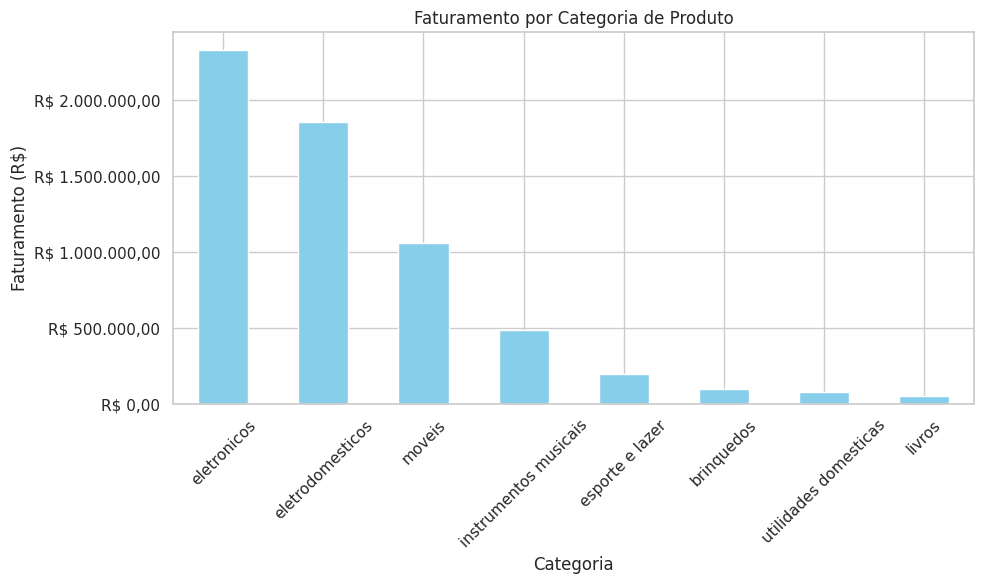

In [54]:
# Formatando como moeda brasileira (R$)
def formatar_moeda(valor, pos):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

sns.set(style="whitegrid")

# Faturamento por categoria (gráfico de barras)
plt.figure(figsize=(10,6))
ax = faturamento_total_por_categoria.plot(kind='bar', color="skyblue")
plt.title("Faturamento por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(FuncFormatter(formatar_moeda))

plt.tight_layout()
plt.show()

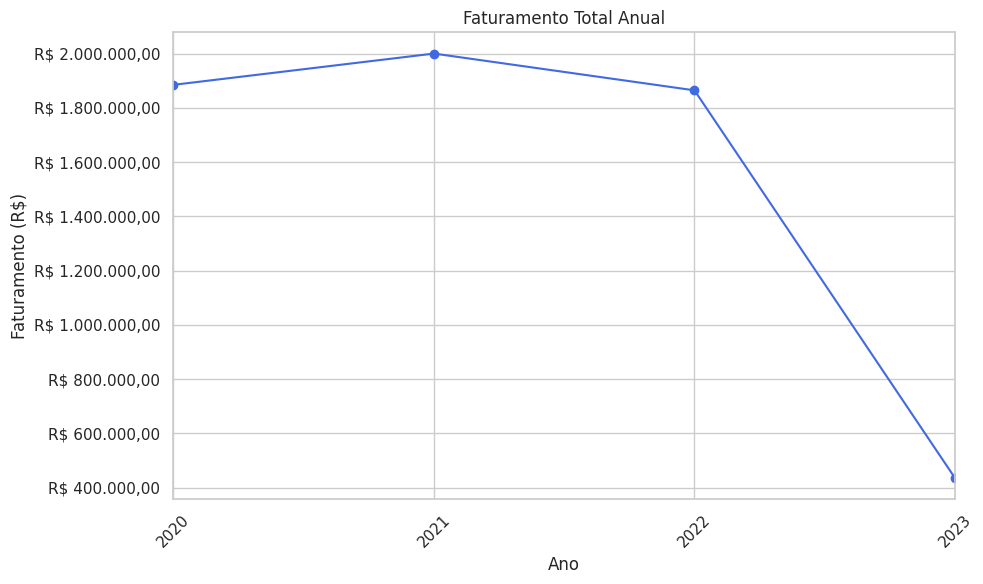

In [65]:
# Formatando como moeda brasileira (R$)
def formatar_moeda(valor, pos):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Faturamento anual (linha)
plt.figure(figsize=(10,6))
ax = faturamento_total_por_ano.plot(marker='o', color='royalblue')
plt.title("Faturamento Total Anual")
plt.xlabel("Ano")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(FuncFormatter(formatar_moeda))

plt.tight_layout()
plt.show()

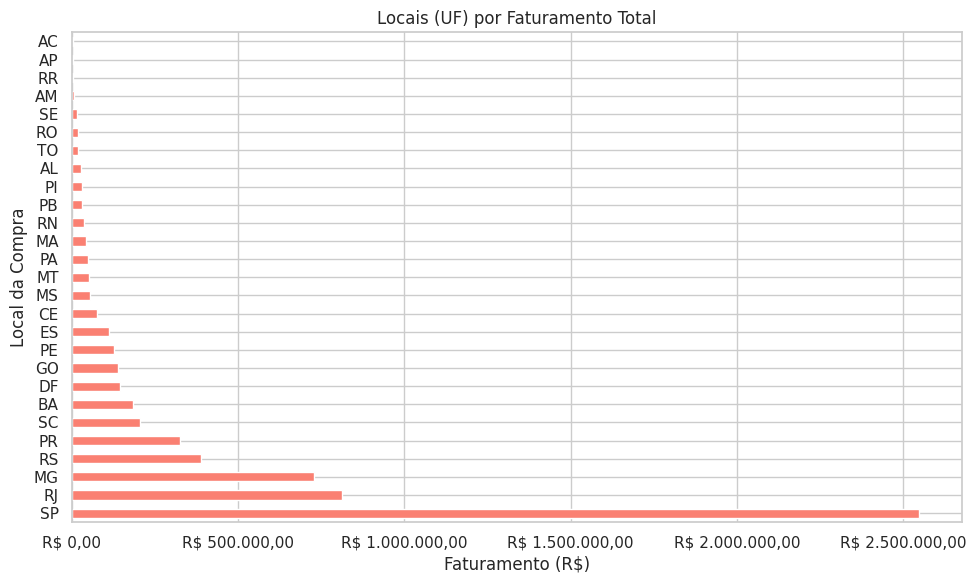

In [64]:
# Formatando como moeda brasileira (R$)
def formatar_moeda(valor, pos):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Faturamento total por local (UF)
plt.figure(figsize=(10,6))
ax = faturamento_total_por_local.plot(kind='barh', color='salmon')
plt.title("Locais (UF) por Faturamento Total")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Local da Compra")

ax.xaxis.set_major_formatter(FuncFormatter(formatar_moeda))

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria (em quantidade)


In [66]:
# Quantidade de vendas por categoria
vendas_por_categoria = lojas['Categoria do Produto'].value_counts().sort_values(ascending=False)

print("Quantidade de Vendas por Categoria:")
print(vendas_por_categoria)


Quantidade de Vendas por Categoria:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


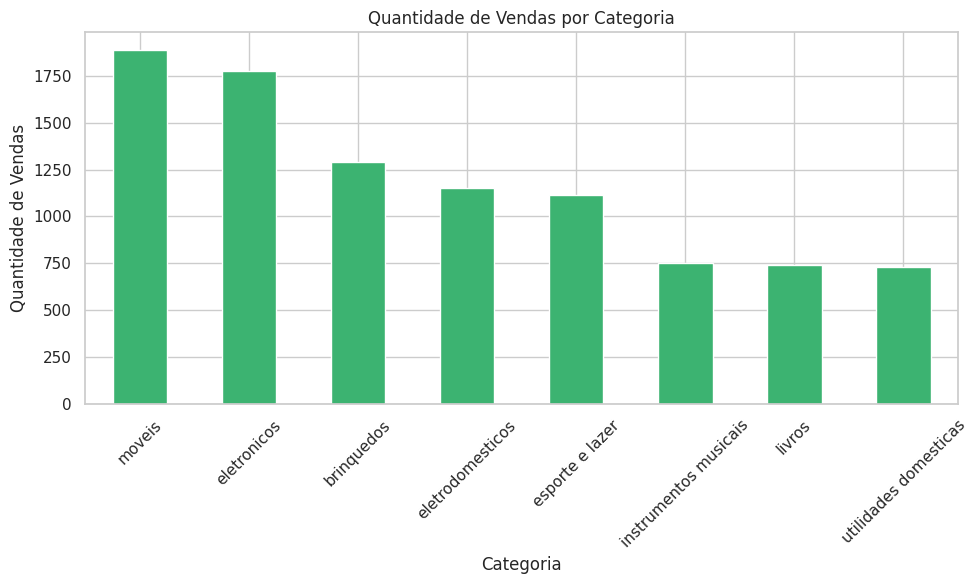

In [67]:
# Visualização (gráfico de barras)
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
ax = vendas_por_categoria.plot(kind='bar', color='mediumseagreen')
plt.title("Quantidade de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()

# 3. Média de Avaliação das Lojas por (UF) - Considerando as 4 lojas

In [69]:
media_avaliacao_por_local = lojas.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)

print("Média de Avaliação por Local (UF):")
print(media_avaliacao_por_local)


Média de Avaliação por Local:
Local da compra
RN    4.208333
SP    4.113619
MT    4.112500
MS    4.097561
MG    4.090744
PB    4.086957
PR    4.078224
AM    4.071429
DF    4.020661
RS    4.018727
ES    4.017544
SC    4.011561
PE    3.977901
GO    3.940860
RO    3.894737
TO    3.827586
BA    3.803226
PI    3.800000
AP    3.777778
RJ    3.777228
PA    3.691358
MA    3.677419
AC    3.666667
AL    3.634146
CE    3.596026
SE    3.464286
RR    3.000000
Name: Avaliação da compra, dtype: float64


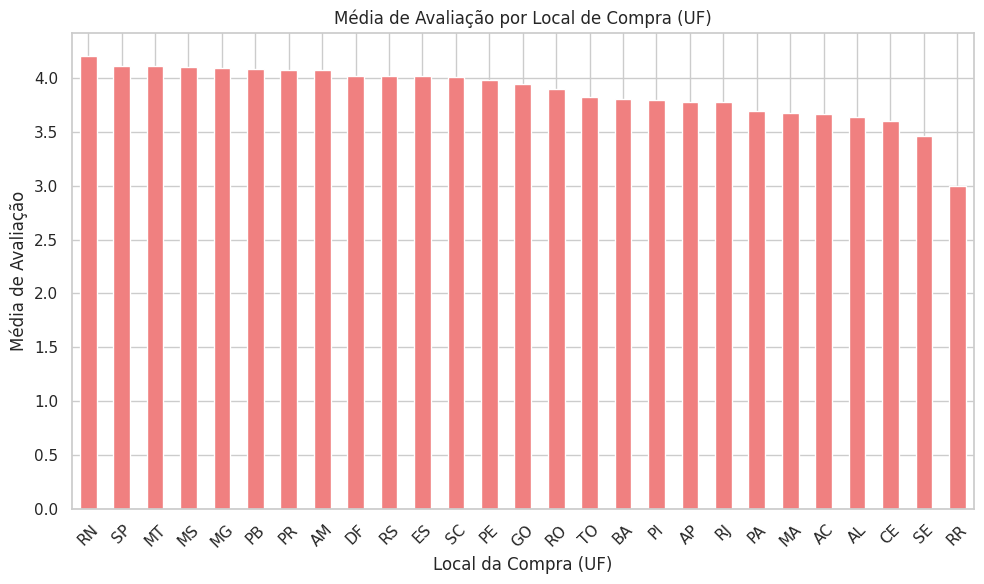

In [108]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
ax = media_avaliacao_por_local.plot(kind='bar', color='lightcoral')
plt.title("Média de Avaliação por Local de Compra (UF)")
plt.xlabel("Local da Compra (UF)")
plt.ylabel("Média de Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3. Média de Avaliação das Lojas por loja

In [73]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

In [81]:
medias_avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [
        media_avaliacao_loja1,
        media_avaliacao_loja2,
        media_avaliacao_loja3,
        media_avaliacao_loja4
    ]
})

medias_avaliacoes.sort_values(by='Média de Avaliação', ascending=False)


,Loja,Média de Avaliação
2,Loja 3,4.048326
1,Loja 2,4.037304
3,Loja 4,3.995759
0,Loja 1,3.976685


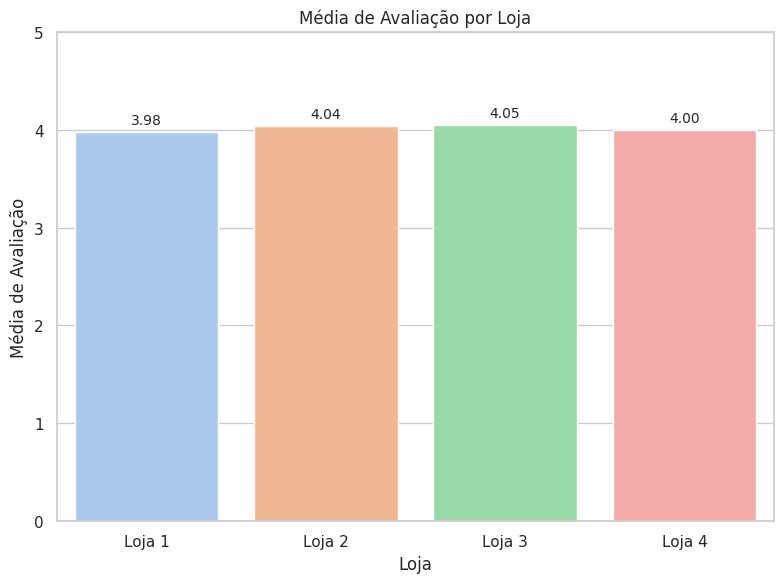

In [85]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

ax = sns.barplot(
    x='Loja',
    y='Média de Avaliação',
    hue='Loja',
    data=medias_avaliacoes,
    palette='pastel',
    legend=False
)

plt.title("Média de Avaliação por Loja")
plt.ylim(0, 5)
plt.xlabel("Loja")
plt.ylabel("Média de Avaliação")
plt.tight_layout()

for i, row in medias_avaliacoes.reset_index().iterrows():
    ax.text(i, row['Média de Avaliação'] + 0.05, f"{row['Média de Avaliação']:.2f}",
            ha='center', va='bottom', fontsize=10)

plt.show()

# 4. Produtos Mais e Menos Vendidos

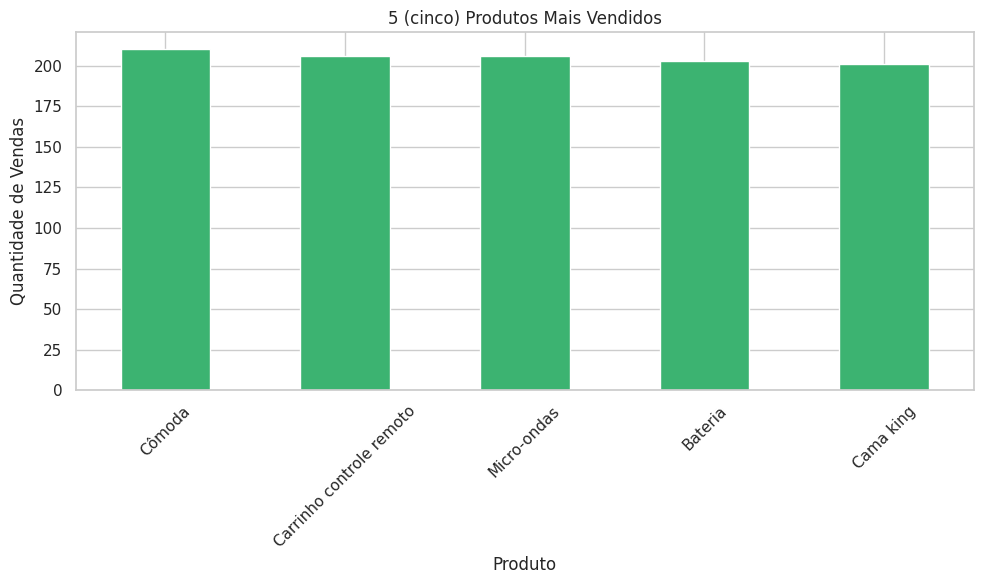

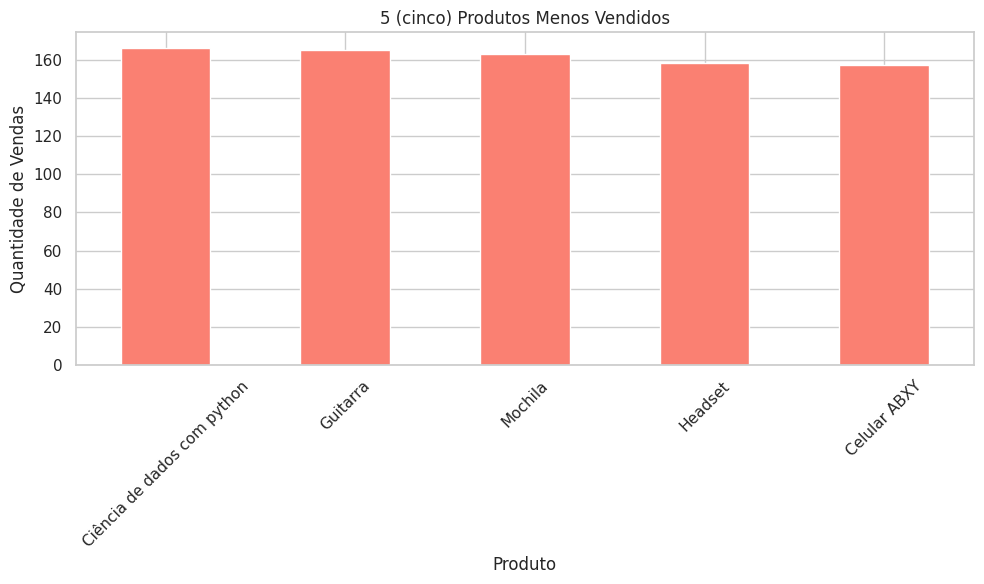

In [109]:
vendas_por_produto = lojas['Produto'].value_counts()

sns.set(style="whitegrid")

# 5 (cinco) produtos mais vendidos
plt.figure(figsize=(10,6))
ax1 = vendas_por_produto.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("5 (cinco) Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5 (cinco) produtos menos vendidos
plt.figure(figsize=(10,6))
ax2 = vendas_por_produto.tail(5).plot(kind='bar', color='salmon')
plt.title("5 (cinco) Produtos Menos Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [94]:
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

fretes_medios = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [
        frete_medio_loja1,
        frete_medio_loja2,
        frete_medio_loja3,
        frete_medio_loja4
    ]
})

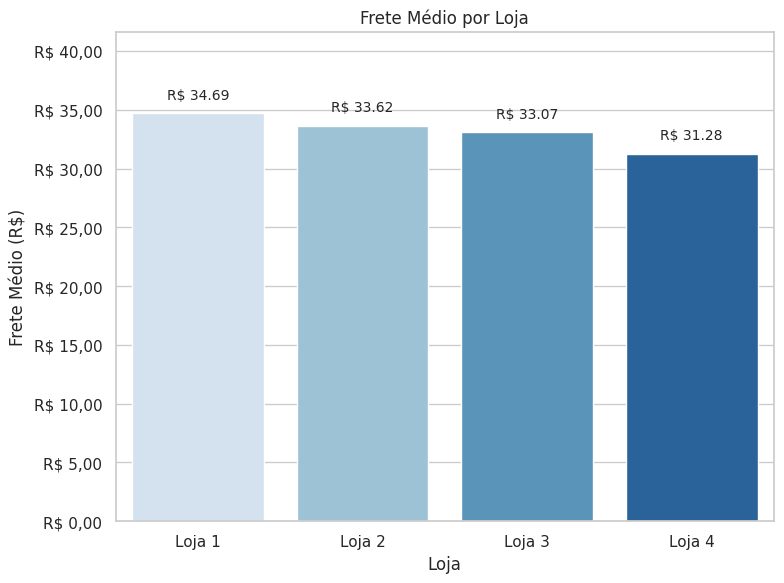

In [95]:
# Formatando como moeda BR
def formatar_moeda(valor, pos):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Loja', y='Frete Médio', hue='Loja', data=fretes_medios, palette='Blues', legend=False)
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.ylim(0, fretes_medios['Frete Médio'].max() * 1.2)

ax.yaxis.set_major_formatter(FuncFormatter(formatar_moeda))

for i, row in fretes_medios.iterrows():
    ax.text(i, row['Frete Médio'] + 1, f"R$ {row['Frete Médio']:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Qual a melhor loja

Critério | Objetivo | Melhor é...
Faturamento Total | Gera mais receita | Maior
Número de Vendas | Mais vendas realizadas | Maior
Média de Avaliação | Satisfação do cliente | Maior
Frete Médio | Economia pro cliente | Menor
Ticket Médio | Valor médio por venda | Maior

In [110]:
from sklearn.preprocessing import MinMaxScaler

def analisar_loja(df, nome_loja):
    faturamento = (df['Preço'] + df['Frete']).sum()
    num_vendas = df.shape[0]
    media_avaliacao = df['Avaliação da compra'].mean()
    frete_medio = df['Frete'].mean()
    ticket_medio = faturamento / num_vendas if num_vendas > 0 else 0

    return {
        'Loja': nome_loja,
        'Faturamento Total': faturamento,
        'Número de Vendas': num_vendas,
        'Média de Avaliação': media_avaliacao,
        'Frete Médio': frete_medio,
        'Ticket Médio': ticket_medio
    }

dados_lojas = [
    analisar_loja(loja1, 'Loja 1'),
    analisar_loja(loja2, 'Loja 2'),
    analisar_loja(loja3, 'Loja 3'),
    analisar_loja(loja4, 'Loja 4'),
]

df_comparativo = pd.DataFrame(dados_lojas)

df_normalizado = df_comparativo.copy()
scaler = MinMaxScaler()

df_normalizado['Frete Médio'] = df_normalizado['Frete Médio'].max() - df_normalizado['Frete Médio']

colunas_para_normalizar = ['Faturamento Total', 'Número de Vendas', 'Média de Avaliação', 'Frete Médio', 'Ticket Médio']
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])

df_normalizado['Pontuação Total'] = df_normalizado[colunas_para_normalizar].sum(axis=1)

resultado_final = df_comparativo.copy()
resultado_final['Pontuação Total'] = df_normalizado['Pontuação Total']

resultado_final = resultado_final.sort_values(by='Pontuação Total', ascending=False).reset_index(drop=True)

print("🏆 Resultado da análise - Melhor Loja considerando todos os critérios:")
print(resultado_final)

🏆 Resultado da análise - Melhor Loja considerando todos os critérios:
     Loja  Faturamento Total  Número de Vendas  Média de Avaliação  \
0  Loja 2       1.567773e+06              2359            4.037304   
1  Loja 3       1.542048e+06              2359            4.048326   
2  Loja 1       1.616347e+06              2359            3.976685   
3  Loja 4       1.458253e+06              2358            3.995759   

   Frete Médio  Ticket Médio  Pontuação Total  
0    33.621941    664.592293         3.543937  
1    33.074464    653.687025         3.532116  
2    34.691805    685.183166         3.000000  
3    31.278997    618.428098         1.266247  


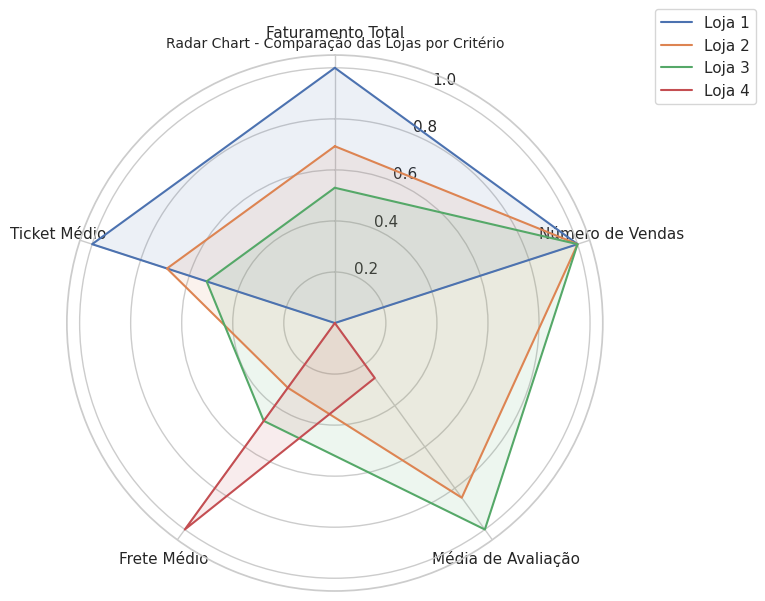

In [102]:
criterios = ['Faturamento Total', 'Número de Vendas', 'Média de Avaliação', 'Frete Médio', 'Ticket Médio']
labels = df_normalizado['Loja']
num_vars = len(criterios)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_normalizado.iterrows():
    values = row[criterios].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Loja'])
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), criterios)
plt.title("Radar Chart - Comparação das Lojas por Critério", size=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

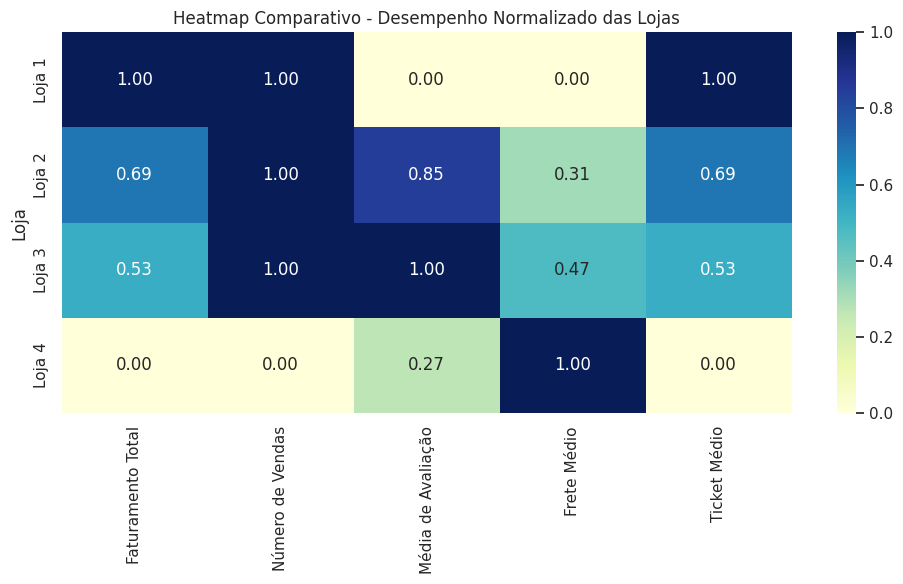

In [103]:
heatmap_data = df_normalizado.set_index('Loja')[criterios]

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Heatmap Comparativo - Desempenho Normalizado das Lojas")
plt.tight_layout()
plt.show()

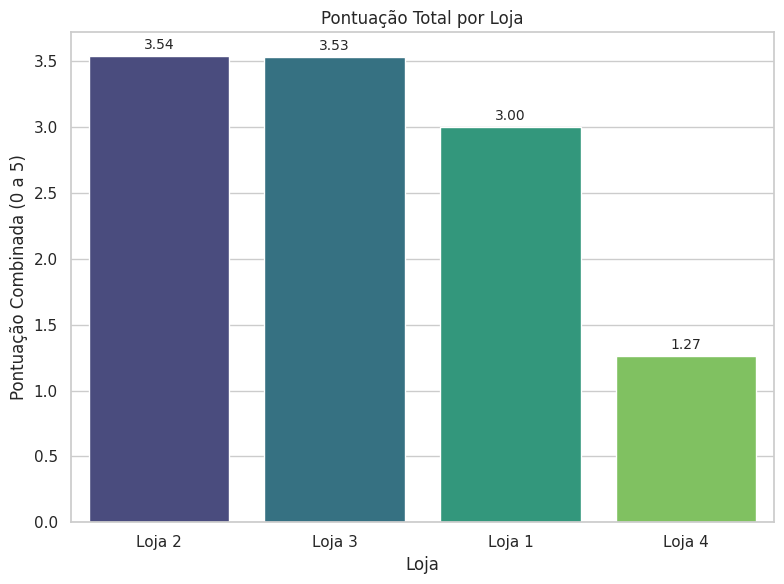

In [107]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Loja', y='Pontuação Total', data=resultado_final, hue='Loja', palette='viridis')

for i, row in resultado_final.iterrows():
    ax.text(i, row['Pontuação Total'] + 0.03, f"{row['Pontuação Total']:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Pontuação Total por Loja")
plt.ylabel("Pontuação Combinada (0 a 5)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()

## Resultados:

Ao analisar os resultados obtidos considerando os critérios de:

- Faturamento;
- Avaliação dos clientes;
- Frete médio;
-Ticket médio e
- Número de vendas

A melhor loja é a loja 2 com uma pontuação de 3.54, seguida da loja 3 com pontuação de 3.53, loja 1 com pontuação de 3.00 e por último a loja 4 com uma pontuação de 1.27 que representa 64.15% abaixo da pontuação da loja 2, ou seja, a loja 4 apresenta o pior desempenho quando comparada com as outras lojas e precisa melhorar os seus indicadores para conseguir resultados próximos das outras lojas.

### Estratégia para a Loja 4

- Aumentar a visibilidade da loja por meio de campanhas de marketing (digital e não digital);
- Oferecer promoções sazonais;
- Oferecer descontos em compras múltiplas e frete grátis para compras acima de R$ 300,00 (por exemplo);
- Melhorar o atendimento ao cliente (focando nas correções das reclamações de transporte, armazenamento e tempo de atendimento).
